<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/Passengers_Tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare Data

In [93]:
# Import Packages
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas as pd 
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import layers,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import preprocessing

import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras import layers
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM,Bidirectional,GRU

from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [4]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import Data

data = pd.read_csv('/content/drive/MyDrive/air122.csv')

In [6]:
# Check Data
data


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
# Check "Month" column type
data['Month'].dtype

dtype('O')

In [8]:
## Reset Index

data= data.reset_index()

In [9]:
# Check Data
data.head(16)

,index,Month,Passengers
0,0,1949-01,112
1,1,1949-02,118
2,2,1949-03,132
3,3,1949-04,129
4,4,1949-05,121
5,5,1949-06,135
6,6,1949-07,148
7,7,1949-08,148
8,8,1949-09,136
9,9,1949-10,119


In [144]:

seq = data["Passengers"]
x = seq[0:-1]
y = seq[1:]

x = np.array(x)
y = np.array(y)

x3 = [ float(i) for i in x]

x4 = np.array(x3)
x5 = x4.reshape(x4.shape[0],1)





ft = MinMaxScaler()
ft.fit(x5)



x1 = ft.transform(x5)

x2 = np.array(x1)
x2 = x2.reshape(x2.shape[0],1,1)


In [140]:
## Split Data

xtrain, xtest, ytrain, ytest= train_test_split(x2,y,test_size=0.1, random_state=0)

In [141]:
# Check Shape


xtrain.shape, ytrain.shape,xtest.shape,ytest.shape

((128, 1, 1), (128,), (15, 1, 1), (15,))

## Lsmt_Model

In [142]:
from keras.backend import dropout
from keras.layers.convolutional import activations


# Create model

Lstm_Model = Sequential()
Lstm_Model.add(LSTM(units=10,input_shape=(1,1)))

Lstm_Model.add(Dense(1,activation="sigmoid"))

In [143]:
# Compile Model
Lstm_Model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae','mse'])
# Fit Model
Lstm_History = Lstm_Model.fit(xtrain,  ytrain,validation_data=(xtest,ytest), epochs=95,batch_size=8)

Epoch 1/95
16/16 [==============================] - 2s 37ms/step - loss: 91814.3438 - mae: 279.1888 - mse: 91814.3438 - val_loss: 104102.5859 - val_mae: 295.6423 - val_mse: 104102.5859
Epoch 2/95
16/16 [==============================] - 0s 4ms/step - loss: 91731.0078 - mae: 279.0475 - mse: 91731.0078 - val_loss: 104002.0391 - val_mae: 295.4795 - val_mse: 104002.0312
Epoch 3/95
16/16 [==============================] - 0s 4ms/step - loss: 91643.4219 - mae: 278.8919 - mse: 91643.4219 - val_loss: 103927.4062 - val_mae: 295.3506 - val_mse: 103927.3984
Epoch 4/95
16/16 [==============================] - 0s 4ms/step - loss: 91594.2109 - mae: 278.7999 - mse: 91594.2109 - val_loss: 103900.7109 - val_mae: 295.2998 - val_mse: 103900.7031
Epoch 5/95
16/16 [==============================] - 0s 4ms/step - loss: 91578.2422 - mae: 278.7670 - mse: 91578.2422 - val_loss: 103892.7969 - val_mae: 295.2835 - val_mse: 103892.7969
Epoch 6/95
16/16 [==============================] - 0s 4ms/step - loss: 91573.0

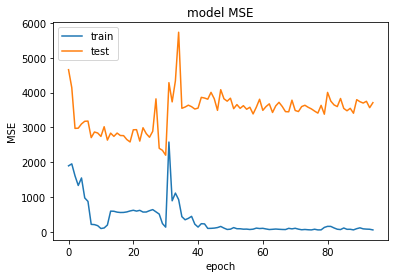

In [ ]:
## Plots

#pd.DataFrame(Lstm_History.history).plot(figsize=(10,10))

# summarize history for MSE

plt.plot(Lstm_History.history['mse'])
plt.plot(Lstm_History.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

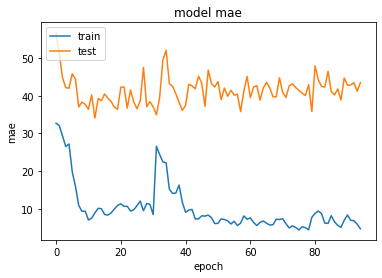

In [ ]:
# summarize history for mae

plt.plot(Lstm_History.history['mae'])
plt.plot(Lstm_History.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

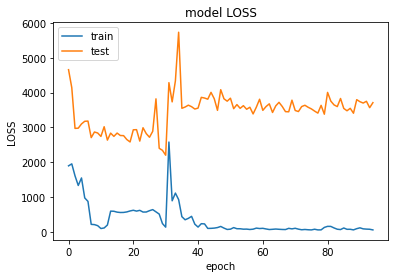

In [ ]:
# summarize history for Loss

plt.plot(Lstm_History.history['loss'])
plt.plot(Lstm_History.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Lstm_Model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 1, 1000)           623000    
                                                                 
 lstm_51 (LSTM)              (None, 1, 1000)           8004000   
                                                                 
 lstm_52 (LSTM)              (None, 1000)              8004000   
                                                                 
 dense_38 (Dense)            (None, 100)               100100    
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16,731,201
Trainable params: 16,731,201
Non-trainable params: 0
_________________________________________________________________


## BLSTM MODEL

In [ ]:
from keras.backend import dropout
from keras.layers.convolutional import activations
# Set the random Seed
tf.random.set_seed(42)

# Create model

Blstm_Model = Sequential()
Blstm_Model.add(Embedding(input_dim = 623 ,output_dim = 1500, input_length=1))
Blstm_Model.add(Bidirectional(LSTM(1500,dropout=0.3,return_sequences=True)))
Blstm_Model.add(Bidirectional(LSTM(1500,dropout=0.3)))
Blstm_Model.add(Dense(100,activation="relu"))

Blstm_Model.add(Dense(1,activation="relu"))

In [ ]:
# Compile Model
Blstm_Model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae','mse'])
# Fit Model
Blstm_History = Blstm_Model.fit(xtrain,  ytrain,validation_data=(xtest,ytest), epochs=111,batch_size=32)

Epoch 1/111
4/4 [==============================] - 15s 2s/step - loss: 287.1907 - mae: 287.1907 - mse: 96597.6094 - val_loss: 187.0126 - val_mae: 187.0126 - val_mse: 45741.7070
Epoch 2/111
4/4 [==============================] - 3s 767ms/step - loss: 150.8393 - mae: 150.8393 - mse: 33139.5859 - val_loss: 115.3116 - val_mae: 115.3116 - val_mse: 23150.4961
Epoch 3/111
4/4 [==============================] - 3s 861ms/step - loss: 162.3553 - mae: 162.3553 - mse: 36669.9961 - val_loss: 154.8331 - val_mae: 154.8331 - val_mse: 31972.8594
Epoch 4/111
4/4 [==============================] - 3s 755ms/step - loss: 113.0290 - mae: 113.0290 - mse: 20613.8535 - val_loss: 76.5288 - val_mae: 76.5288 - val_mse: 9782.9082
Epoch 5/111
4/4 [==============================] - 3s 756ms/step - loss: 89.2834 - mae: 89.2834 - mse: 12046.4248 - val_loss: 68.0220 - val_mae: 68.0220 - val_mse: 7957.1226
Epoch 6/111
4/4 [==============================] - 3s 752ms/step - loss: 84.8763 - mae: 84.8763 - mse: 11188.3457 -

In [ ]:
# Model Summary()
Blstm_Model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1, 1500)           934500    
                                                                 
 bidirectional_10 (Bidirecti  (None, 1, 3000)          36012000  
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 3000)             54012000  
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 100)               300100    
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 91,258,701
Trainable params: 91,258,701


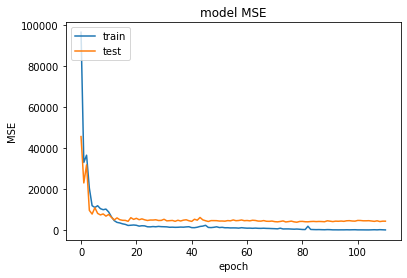

In [ ]:

# summarize history for MSE

plt.plot(Blstm_History.history['mse'])
plt.plot(Blstm_History.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

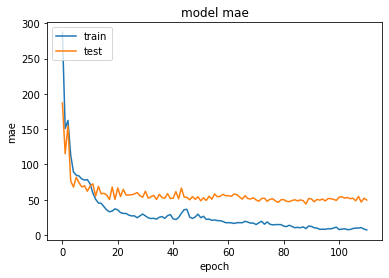

In [ ]:
# summarize history for mae

plt.plot(Blstm_History.history['mae'])
plt.plot(Blstm_History.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

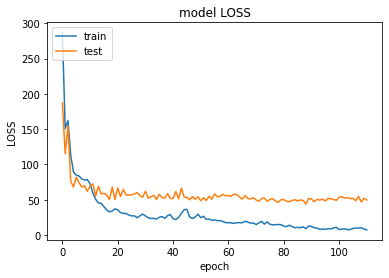

In [ ]:
# summarize history for Loss

plt.plot(Blstm_History.history['loss'])
plt.plot(Blstm_History.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## GRU MODEL

In [ ]:
from keras.backend import dropout
from keras.layers.convolutional import activations
# Set the random Seed
tf.random.set_seed(42)

# Create model

Gru_Model = Sequential()
Gru_Model.add(Embedding(input_dim = 623 ,output_dim = 1000, input_length=1))
Gru_Model.add(GRU(1000,dropout=0.6,return_sequences=True))
Gru_Model.add(GRU(1000,dropout=0.3))
Gru_Model.add(Dense(100,activation="relu"))
Gru_Model.add(Dense(1,activation="relu"))



In [ ]:
# Compile Model
Gru_Model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae','mse'])
# Fit Model
Gru_History = Gru_Model.fit(xtrain,  ytrain,validation_data=(xtest,ytest), epochs=100,batch_size=32)

Epoch 1/100
4/4 [==============================] - 6s 412ms/step - loss: 286.2227 - mae: 286.2227 - mse: 95908.4297 - val_loss: 232.3380 - val_mae: 232.3380 - val_mse: 61385.8477
Epoch 2/100
4/4 [==============================] - 1s 134ms/step - loss: 156.2777 - mae: 156.2777 - mse: 35601.1797 - val_loss: 96.2505 - val_mae: 96.2505 - val_mse: 12269.9053
Epoch 3/100
4/4 [==============================] - 1s 134ms/step - loss: 105.9967 - mae: 105.9967 - mse: 16459.8848 - val_loss: 87.2188 - val_mae: 87.2188 - val_mse: 11700.7881
Epoch 4/100
4/4 [==============================] - 1s 136ms/step - loss: 120.1327 - mae: 120.1327 - mse: 21000.2793 - val_loss: 74.1379 - val_mae: 74.1379 - val_mse: 8222.7363
Epoch 5/100
4/4 [==============================] - 1s 134ms/step - loss: 104.2413 - mae: 104.2413 - mse: 15989.3301 - val_loss: 84.1394 - val_mae: 84.1394 - val_mse: 10175.5459
Epoch 6/100
4/4 [==============================] - 1s 138ms/step - loss: 96.9555 - mae: 96.9555 - mse: 13950.4453 

In [ ]:
# Model Summary

Gru_Model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 1, 1000)           623000    
                                                                 
 gru_27 (GRU)                (None, 1, 1000)           6006000   
                                                                 
 gru_28 (GRU)                (None, 1000)              6006000   
                                                                 
 dense_40 (Dense)            (None, 100)               100100    
                                                                 
 dense_41 (Dense)            (None, 1)                 101       
                                                                 
Total params: 12,735,201
Trainable params: 12,735,201
Non-trainable params: 0
_________________________________________________________________


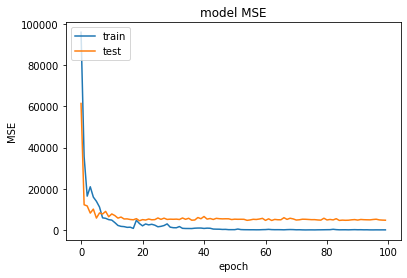

In [ ]:
# summarize history for MSE

plt.plot(Gru_History.history['mse'])
plt.plot(Gru_History.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

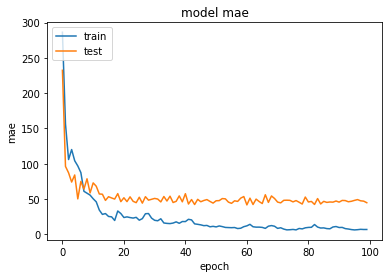

In [ ]:
# summarize history for mae

plt.plot(Gru_History.history['mae'])
plt.plot(Gru_History.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

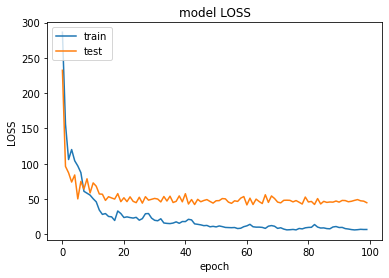

In [ ]:
# summarize history for Loss

plt.plot(Gru_History.history['loss'])
plt.plot(Gru_History.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()